## Task 3: Energy Consumption Time Series Forecasting

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [46]:
df=pd.read_csv('household_power_consumption.csv', sep=',', low_memory=False, na_values='?')
df.head()

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [47]:
df.columns

Index(['index', 'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [48]:
# convert time colummn to datatime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df = df.drop(['Date', 'Time', 'index'], axis=1)
df.set_index('Datetime', inplace=True)


C:\Users\Shahroz\AppData\Local\Temp\ipykernel_6484\296374.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [49]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0


In [50]:

# df = df.apply(pd.to_numeric, errors='coerce')
# df = df.dropna()

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

In [51]:
# Resample Time Series hourly
df_hourly = df.resample('H').mean()
df_hourly.dropna()

C:\Users\Shahroz\AppData\Local\Temp\ipykernel_6484\1662040645.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-01-01 00:00:00,2.550633,0.112800,241.361333,10.530000,0.00,0.583333,0.000000
2007-01-01 01:00:00,2.523400,0.071633,241.096500,10.443333,0.00,0.000000,0.000000
2007-01-01 02:00:00,2.582333,0.106667,243.200167,10.540000,0.00,0.333333,0.000000
2007-01-01 03:00:00,2.541667,0.090100,243.265667,10.400000,0.00,0.266667,0.000000
2007-01-01 04:00:00,2.475733,0.088167,242.456167,10.110000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...
2007-12-06 19:00:00,1.865533,0.296400,239.305000,7.993333,7.75,0.550000,14.383333
2007-12-06 20:00:00,0.560633,0.223233,241.467333,2.633333,0.00,0.366667,0.000000
2007-12-06 21:00:00,1.806100,0.194333,240.117167,7.596667,0.00,0.166667,13.600000


In [52]:
# train test split
train_size = int(len(df_hourly) * 0.8)

train = df_hourly[:train_size]
test = df_hourly[train_size:]

y_train = train['Global_active_power']
y_test = test['Global_active_power']


In [80]:
# Arima Model
model_arima = ARIMA(y_train, order=(2,1,2))
model_arima_fit = model_arima.fit()

arima_forecast = model_arima_fit.forecast(steps=len(test))


c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary

In [82]:
# Prophet Model
prophet_train = train.reset_index()[['Datetime', 'Global_active_power']]
prophet_train.columns = ['ds', 'y']

model_prophet = Prophet()
model_prophet.fit(prophet_train)

# Create future dates and forecast
future = model_prophet.make_future_dataframe(periods=len(test), freq='H')
forecast = model_prophet.predict(future)

# Only take last len(test) values
prophet_forecast = forecast['yhat'].iloc[-len(test):].values

22:57:01 - cmdstanpy - INFO - Chain [1] start processing
22:57:01 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Shahroz\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1875: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [83]:
prophet_forecast = pd.Series(prophet_forecast, index=test.index)

In [ ]:
df_features = df_hourly.copy()

df_features['hour'] = df_features.index.hour
df_features['dayofweek'] = df_features.index.dayofweek
df_features['month'] = df_features.index.month
df_features['is_weekend'] = df_features['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df_features.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,dayofweek,month,is_weekend
Datetime,,,,,,,,,,,
2007-01-01 00:00:00,2.550633,0.112800,241.361333,10.530000,0.0,0.583333,0.0,0,0,1,0
2007-01-01 01:00:00,2.523400,0.071633,241.096500,10.443333,0.0,0.000000,0.0,1,0,1,0
2007-01-01 02:00:00,2.582333,0.106667,243.200167,10.540000,0.0,0.333333,0.0,2,0,1,0
2007-01-01 03:00:00,2.541667,0.090100,243.265667,10.400000,0.0,0.266667,0.0,3,0,1,0
2007-01-01 04:00:00,2.475733,0.088167,242.456167,10.110000,0.0,0.000000,0.0,4,0,1,0


In [65]:
# XGBoost Model
print(train['Global_active_power'].isna().sum())
print(test['Global_active_power'].isna().sum())

2677
1200


In [66]:
df_features = df_features.replace([np.inf, -np.inf], np.nan)
df_features = df_features.dropna()


In [ ]:
train_size = int(len(df_features) * 0.8)

train = df_features.iloc[:train_size]
test = df_features.iloc[train_size:]

In [70]:
y_train = train['Global_active_power']
y_test = test['Global_active_power']
X_train = train.drop('Global_active_power', axis=1)
X_test = test.drop('Global_active_power', axis=1)


In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
# Remove infinities
# df_features = df_features.replace([np.inf, -np.inf], np.nan)
# df_features = df_features.dropna()

# # Train-test split
# train_size = int(len(df_features) * 0.8)
# train = df_features.iloc[:train_size]
# test = df_features.iloc[train_size:]

# # Define X and y
# X_train = train.drop('Global_active_power', axis=1)
# y_train = train['Global_active_power']

# X_test = test.drop('Global_active_power', axis=1)
# y_test = test['Global_active_power']

# # Convert to float
# X_train = X_train.astype(float)
# X_test = X_test.astype(float)
# y_train = y_train.astype(float)
# y_test = y_test.astype(float)

# Train model
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

# Forecast XGBBoost
forecast_xgb = model_xgb.predict(X_test)
forecast_xgb = pd.Series(forecast_xgb, index=test.index)



In [90]:
def evaluate(actual, pred, name):
    
    # Force same length
    min_len = min(len(actual), len(pred))
    actual = actual.iloc[:min_len]
    pred = pred.iloc[:min_len]
    
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    
    print(f"{name}")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print()

evaluate(test['Global_active_power'], arima_forecast, "ARIMA")
evaluate(test['Global_active_power'], prophet_forecast, "Prophet")
evaluate(test['Global_active_power'], forecast_xgb, "XGBoost")

ARIMA
MAE: 0.7954257180628647
RMSE: 1.0560016585733751

Prophet
MAE: 0.7369811397559696
RMSE: 1.0316493919807557

XGBoost
MAE: 0.015638010759323636
RMSE: 0.02653607551868814



# Plot Actual vs Forecast

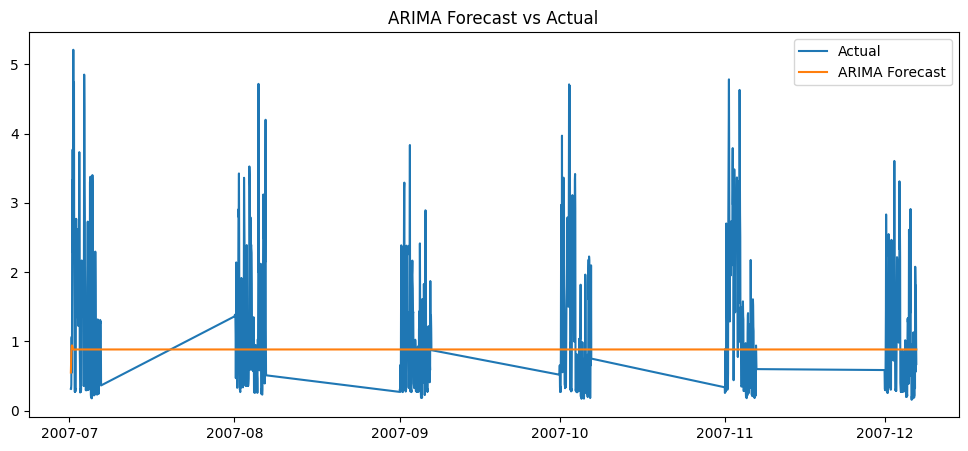

In [96]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Global_active_power'], label="Actual")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


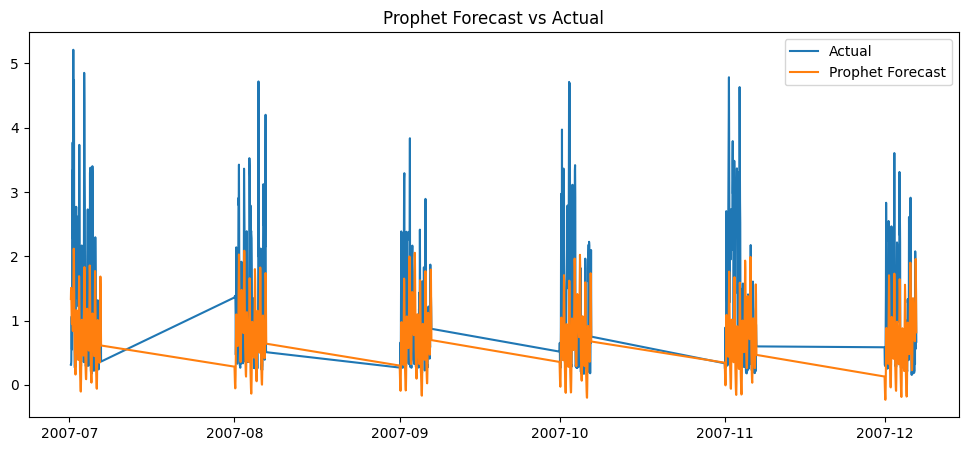

In [97]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Global_active_power'], label="Actual")
plt.plot(test.index, prophet_forecast, label="Prophet Forecast")
plt.legend()
plt.title("Prophet Forecast vs Actual")
plt.show()


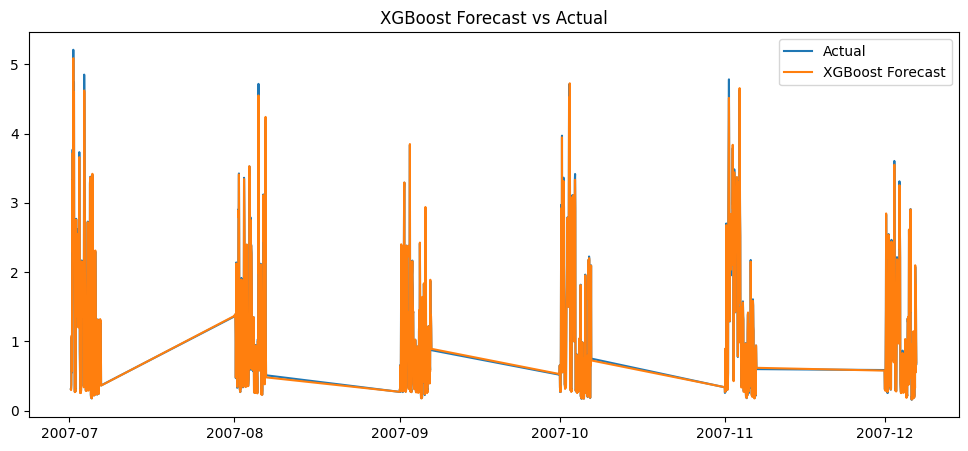

In [98]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Global_active_power'], label="Actual")
plt.plot(test.index, forecast_xgb, label="XGBoost Forecast")
plt.legend()
plt.title("XGBoost Forecast vs Actual")
plt.show()
